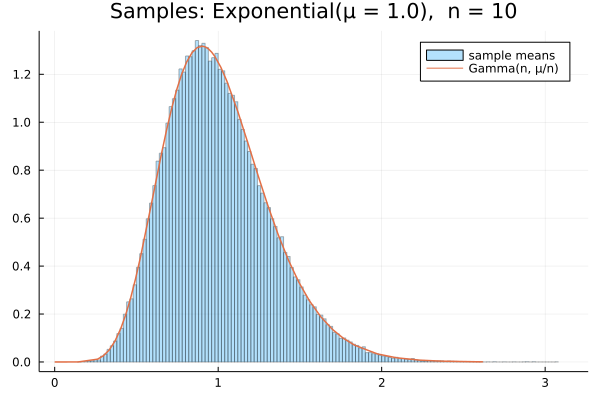

In [1]:
using Distributions
using StatsPlots

n = 10
L = 10^5
μ = 1.0
dist = Exponential(μ)
X̄ = [mean(rand(dist, n)) for _ in 1:L]
histogram(X̄; norm=true, alpha=0.3, label="sample means")
plot!(Gamma(n, μ/n); label="Gamma(n, μ/n)", lw=1.5)
title!("Samples: Exponential(μ = $μ),  n = $n")

In [2]:
using Distributions
using Random
using Roots

function ci_exp(n, x̄; α = 0.05)
    t0 = log(quantile(Gamma(n, x̄/n), 1 - α/2))
    L = find_zero(t -> cdf(Gamma(n, exp(t)/n), x̄) - (1 - α/2), t0) |> exp
    t0 = log(quantile(Gamma(n, x̄/n), α/2))
    R = find_zero(t -> cdf(Gamma(n, exp(t)/n), x̄) - α/2, t0) |> exp
    (L, R)
end

is_in(ci, x) = ci[1] ≤ x ≤ ci[2]

function prob_true_val_is_in_ci_exp(; n = 10, L = 10^5, μ = 1.0, α = 0.05)
    dist = Exponential(μ)
    tmp = zeros(n)
    prob = count(_ -> is_in(ci_exp(n, mean(rand!(dist, tmp)); α), μ), 1:L)/L
end

for n in (10, 20, 40, 100)
    @eval @show prob_true_val_is_in_ci_exp(n = $n)
end

prob_true_val_is_in_ci_exp(n = 10) = 0.94841
prob_true_val_is_in_ci_exp(n = 20) = 0.95056
prob_true_val_is_in_ci_exp(n = 40) = 0.95005
prob_true_val_is_in_ci_exp(n = 100) = 0.95028
